# เตรียมข้อมูล

In [8]:
import os
os.getcwd()

'c:\\Users\\PPUNN\\Documents\\gitproject\\stat_assignment2\\clustering'

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import metrics
%matplotlib inline

In [10]:
orig_df = pd.read_excel("clustering_data.xlsx")
orig_df

,กระทรวง-งบรายจ่าย,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,รวม
0,งบกลาง,15500,89908,61900,370782.6,76525.6,614616.2
1,สำนักนายกรัฐมนตรี,4104.5,3078.3,6104.3,12397,13606.8,39290.9
2,กระทรวงกลาโหม,91027.4,24102.9,14426.1,4794.4,80179.8,214530.6
3,กระทรวงการคลัง,12988.2,6567.9,3421.2,599.4,244863.5,268440.2
4,กระทรวงการต่างประเทศ,2697.3,2509.6,397.5,1348.7,1203.3,8156.4
5,กระทรวงการท่องเที่ยวและกีฬา,1572.6,892.1,1564.4,735.9,1327.7,6092.7
6,กระทรวงการพัฒนาสังคมและความมั่นคงของมนุษย์,2746.6,2519.3,397.8,16598.3,79.8,22341.8
7,กระทรวงการอุดมศึกษา วิทยาศาสตร์ วิจัยและนวัตกรรม,11248.4,939.9,9956.4,104384.6,1597.7,128127.0
8,กระทรวงเกษตรเเละสหกรณ์,24376.6,11495.8,72292.8,2001.1,564.8,110731.1
9,กระทรวงคมนาคม,9704.7,2436.2,177009.1,57.1,751.6,189958.7


In [11]:
orig_df.drop([0,21,22,23,24,25,26,27,28,29,30,31,32], inplace=True)
orig_df

,กระทรวง-งบรายจ่าย,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,รวม
1,สำนักนายกรัฐมนตรี,4104.5,3078.3,6104.3,12397,13606.8,39290.9
2,กระทรวงกลาโหม,91027.4,24102.9,14426.1,4794.4,80179.8,214530.6
3,กระทรวงการคลัง,12988.2,6567.9,3421.2,599.4,244863.5,268440.2
4,กระทรวงการต่างประเทศ,2697.3,2509.6,397.5,1348.7,1203.3,8156.4
5,กระทรวงการท่องเที่ยวและกีฬา,1572.6,892.1,1564.4,735.9,1327.7,6092.7
6,กระทรวงการพัฒนาสังคมและความมั่นคงของมนุษย์,2746.6,2519.3,397.8,16598.3,79.8,22341.8
7,กระทรวงการอุดมศึกษา วิทยาศาสตร์ วิจัยและนวัตกรรม,11248.4,939.9,9956.4,104384.6,1597.7,128127.0
8,กระทรวงเกษตรเเละสหกรณ์,24376.6,11495.8,72292.8,2001.1,564.8,110731.1
9,กระทรวงคมนาคม,9704.7,2436.2,177009.1,57.1,751.6,189958.7
10,กระทรวงดิจิทัลเพื่อเสรษฐกิจและสังคม,1311.6,2009.9,1243.4,1945.8,1791,8301.7


In [12]:
orig_df.to_csv(r'clustering_data.csv', index = False, header=True)

# Kmean

In [14]:
df = pd.read_csv("clustering_data.csv")
df

,กระทรวง-งบรายจ่าย,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,รวม
0,สำนักนายกรัฐมนตรี,4104.5,3078.3,6104.3,12397.0,13606.8,39290.9
1,กระทรวงกลาโหม,91027.4,24102.9,14426.1,4794.4,80179.8,214530.6
2,กระทรวงการคลัง,12988.2,6567.9,3421.2,599.4,244863.5,268440.2
3,กระทรวงการต่างประเทศ,2697.3,2509.6,397.5,1348.7,1203.3,8156.4
4,กระทรวงการท่องเที่ยวและกีฬา,1572.6,892.1,1564.4,735.9,1327.7,6092.7
5,กระทรวงการพัฒนาสังคมและความมั่นคงของมนุษย์,2746.6,2519.3,397.8,16598.3,79.8,22341.8
6,กระทรวงการอุดมศึกษา วิทยาศาสตร์ วิจัยและนวัตกรรม,11248.4,939.9,9956.4,104384.6,1597.7,128127.0
7,กระทรวงเกษตรเเละสหกรณ์,24376.6,11495.8,72292.8,2001.1,564.8,110731.1
8,กระทรวงคมนาคม,9704.7,2436.2,177009.1,57.1,751.6,189958.7
9,กระทรวงดิจิทัลเพื่อเสรษฐกิจและสังคม,1311.6,2009.9,1243.4,1945.8,1791.0,8301.7


C:\Users\PPUNN\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 3585 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\PPUNN\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 3619 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\PPUNN\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 3632 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\PPUNN\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 3607 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\PPUNN\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 3623 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\PPUNN\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 3591 missing from current

<AxesSubplot:>

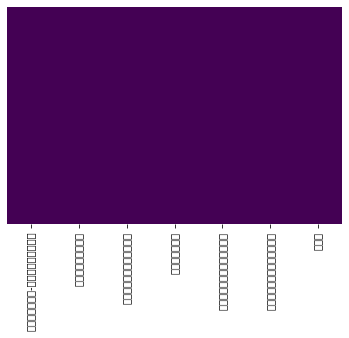

In [15]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [16]:
df.describe()

,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,รวม
count,20.000000,20.000000,20.000000,20.00000,20.000000,20.000000
mean,27195.485000,6160.595000,19022.945000,27206.26000,19430.800000,99016.085000
std,54545.204505,6930.912416,41009.446754,58029.94422,56140.041536,116020.051845
min,822.000000,531.200000,375.700000,30.70000,79.800000,2279.200000
25%,2295.525000,1416.800000,820.500000,701.77500,709.800000,8108.025000
50%,6904.600000,2514.450000,3377.150000,1941.70000,1556.950000,34313.300000
75%,14581.200000,9455.200000,15075.950000,13447.32500,3102.775000,156841.400000
max,223199.600000,24102.900000,177009.100000,235503.60000,244863.500000,356449.700000
